<center><img src="images/MLU-NEW-logo.png" alt="drawing" width="400" style="background-color:white; padding:1em;" /></center> <br/>

# <a name="0">Improve Factual Consistency Part 1a </a>
## <a name="0">Improving Factual Consistency and Explainability using standalone LLM  </a>

### Glossary of Terms
- Naive Judge : This LLM has **no** access to transcript but only question and two summaries. Measure the baseline performance.
- Expert Judge : This LLM has access to transcript along with question and two summaries
- Question asked to LLM (in all experiments): It is always the same: `Which one of these summaries is the most factually consistent one?`

## Dataset
Our dataset is distilled from the Amazon Science evaluation benchmark dataset called <a href="https://github.com/amazon-science/tofueval">TofuEval</a>. 10 summaries have been curated from the [MediaSum documents](https://github.com/zcgzcgzcg1/MediaSum) inside the tofueval dataset for this notebook. 

MediaSum is a large-scale media interview dataset contains 463.6K transcripts with abstractive summaries, collected from interview transcripts and overview / topic descriptions from NPR and CNN.

## LLM Access

We will need access to Anthropic Claude v3 Sonnet, Mistral 7b and  Mixtral 8x7b LLMs for this notebook.

[Anthropic Claude v3(Sonnet)](https://www.anthropic.com/news/claude-3-family) , [Mixtral 8X7B](https://mistral.ai/news/mixtral-of-experts/), [Mistral 7B](https://mistral.ai/news/announcing-mistral-7b/) - all of them pre-trained on general text summarization tasks.

## notebook Overview

In this notebook, we navigate the LLM debating technique with more persuasive LLMs having two expert debater LLMs (Claude and Mixtral) and one judge (using Claude - we can use others like Mistral/Mixtral, Titan Premier) to measure, compare and contrast its performance against other techniques like self-consistency (with naive and expert judges) and LLM consultancy. This notebook is an adapted and partial implementation of one of the ICML 2024 best papers, <a href="https://arxiv.org/pdf/2402.06782"> Debating with More Persuasive LLMs Leads to More Truthful Answers </a> on a new and different Amazon Science evaluation dataset <a href="https://github.com/amazon-science/tofueval">TofuEval</a>. 


- Part 1.  **[THIS notebook]** Demonstrate typical Standalone LLM approach

- Part 2.  Demonstrate the LLM Consultancy approach and compare with Part 1.

- Part 3.  Demonstrate the LLM Debate approach and compare with other methods.


<div style="border: 4px solid coral; text-align: left; margin: auto; padding-left: 20px; padding-right: 20px">
    While this notebook(part 1, 2 and 3) compares various methods and demonstrates the efficacy of LLM Debates in notebook part 3 with a supervised dataset, the greater benefit is possible in unsupervised scenarios where ground truth is unknown and ground truth alignment and/or curation is required. Human annotation can be expensive plus slow and agreement amongst human annotators adds another level of intricacy. A possible `scanotebookle oversight direction could be this LLM debating technique to align on the ground truth options` via this debating and critique mechanism by establishing factual consistency(veracity). This alignment and curation of ground truth for unsupervised data could be a possible win direction for the debating technique in terms of cost versus benefit analysis.
</div>
<br/>


#### Notebook Kernel
Please choose `conda_python3` as the kernel type of the top right corner of the notebook if that does not appear by default.

#### LLMs used
[Anthropic Claude v3(Sonnet)](https://www.anthropic.com/news/claude-3-family) , [Mixtral 8X7B](https://mistral.ai/news/mixtral-of-experts/), [Mistral 7B](https://mistral.ai/news/announcing-mistral-7b/) - all of them pre-trained on general text summarization tasks.

## Use-Case Overview

To demonstrate the measurement and improvement of factual consistency (veracity) with explainability in this notebook, we conduct a series of experiments to choose the best summary for each transcript. In each experiment, we measure the veracity and correctness of the summaries generated from transcripts and improve upon the decision to choose the correct one via methods like LLM consultancy and LLM debates.

The <b>overall task in this notebook</b> is choose which one of the two summaries is most appropriate for a given transcript. There are a total of 10 transcripts and each transcript has 2 summaries - one correct and other incorrect. The incorrect summaries have various classes of errors like `Nuanced Meaning Shift`, `Extrinsic Information` and  `Reasoning errors`. 

In this notebook we will conduct the following set of experiment combinations to measure, compare and contrast LLM debating techniques with others.


## Experiments
For each of these experiments we flip the side of the argument the LLM takes to account for `position bias` and `verbosity bias` and re-run each experiment.

**Note** We always use the same Judge LLM (Mistral 7B) across all the experiments in this notebook




### Experiment 1: (Naive judge - this judge has no access to transcripts): 
<center><img src="images/veracitynotebook01-llm-naive-judge.png" alt="In this image, we depict the flow of Naive LLM judge. First the naive judge LLM has NO access to transcripts just the question and two summaries to choose from
as the more factually consistent. Next the naive judge makes a random guess
which of the two summaries are more factually consistent for 3 rounds. Majority answer is chosen based on self-consistency technique."  height="700" width="700" style="background-color:white; padding:1em;" /></center> <br/>

Claude as naive judge with no access to transcripts. This continues for N(=3 in this notebook) rounds to ensure self-consistency and assert the majority answer as correct. We use this to mark the baseline performance of these series of experiments.

---

### Experiment 2: (Expert judge: This LLM has access to transcripts): 
<center><img src="images/veracitynotebook01-llm-expert-judge.png" alt="In this image, we depict the flow of LLM Expert Judge. First the expert Judge LLM has access to transcripts along with the question and two summaries to choose from
as more factually consistent. Next the expert judge uses the transcript contents to decide which of the two summaries are more factually consistent for 3 rounds. Majority answer is chosen based on self-consistency technique"  height="700" width="700" style="background-color:white; padding:1em;" /></center> <br/>


Claude as expert judge with access to transcripts. This continues for N(=3 in this notebook) rounds.This continues for N(=3 in this notebook) rounds to ensure self-consistency and assert the majority answer as correct.

---

---
## Evaluation Metrics
For each type of experiment we evaluate the accuracy of the answers for that experiment/method type to compare and contrast each method at the end.

For the final experiment on LLM Debate, we also calculate the `win rate` of the LLM debaters to evaluate which of the LLMs actually got most of the answers right as adjudicated by the judge. This can be considered a mechanism to choose one LLM over the other given this use-case.

---


This notebook notebook has the following sections:

1. <a href="#1">Dataset exploration</a>
2. <a href="#2">Naive Judge: no access to transcripts - Arguing for 1st summary</a>
3. <a href="#3">Naive Judge: no access to transcripts - Arguing for 2nd summary</a>
4. <a href="#4">Accuracy of Naive Judge</a>
5. <a href="#5">Expert Judge: access to transcripts - Arguing for 1st summary</a>
6. <a href="#6">Expert Judge: access to transcripts - Arguing for 2nd summary</a>
7. <a href="#7">Accuracy of Expert Judge</a>
8. <a href="#16">Challenge exercise and notebook quiz</a>
    
Please work top to bottom of this notebook and don't skip sections as this could lead to error messages due to missing code.

---

In [2]:
%%capture
!pip install -q -U pip --root-user-action=ignore
!pip3 install -q -r requirements.txt --root-user-action=ignore

In [3]:
# We load all prompts from a separate file prompts.py
%load_ext autoreload
%autoreload 2
from prompts import *

%load_ext autoreload
%autoreload 2
from mlu_utils.veracity_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
clean_up_files_in_dir("./transcripts")
clear_file_contents("./log_files/notebook_run_logs.log")

clear_file_contents dir :: <built-in function dir>


In [5]:
import boto3
import re, time
import random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

from langchain.llms.bedrock import Bedrock
from langchain.prompts import PromptTemplate
from IPython.display import Markdown
from collections import Counter

from IPython.display import Markdown, display
import logging
import boto3, warnings
import pandas as pd
# Supress warnings
warnings.filterwarnings("ignore")
logging.basicConfig(filename='log_files/notebook_run_logs.log', encoding='utf-8', level=logging.INFO)
logger = logging.getLogger(__name__)
logger.info("----- Test logging setup -----")


### Constants used in this notebook

In [6]:
number_of_rounds = 3
question = "Which one of these summaries is the most factually consistent one?"
total_data_points = 10

### <a name="1">Dataset Exploration</a>
(<a href="#0">Go to top</a>)


In [7]:
# pre-process the dataset
answers_df = pd.read_csv("./tofueval_dataset/mediasum_dev_doc_id_group_final_dual_summaries_manual_final_dataset.csv")
#answers_df.head()
interview_df = pd.read_csv("./tofueval_dataset/mediasum_dev_doc_complete_final.csv")
#interview_df.head()

result = pd.merge(answers_df, interview_df, on="doc_id")
final_dataset = result[["doc_id", "topic", "summ_sent_incorrect_original", "summ_sent_correct_manual", "exp", "type", "source"]]
final_dataset

,doc_id,topic,summ_sent_incorrect_original,summ_sent_correct_manual,exp,type,source
0,CNN-104129,Decline of American automobile industry,"GM lost $10B in 2005, continues losing market ...","GM lost $10.6B in 2005, continues losing marke...","It's not ""$10B"" but ""$10.6B""",Nuanced Meaning Shift,DOBBS: General Motors today announced it will ...
1,CNN-138971,Diplomatic efforts,North Korea has announced plans to launch a sa...,Diplomatic efforts to secure the release of Am...,"The launch of a satellite is not mentioned, bu...",Extrinsic Information,ROBERTS: Welcome back to the Most News in the ...
2,CNN-139946,Filibuster-Proof Majority,This filibuster-proof majority means Democrats...,"Democrats gain 60 seats in Senate, giving them...",This is an unsupported statement,Extrinsic Information,ANNOUNCER: This is CNN breaking news.\nMALVEAU...
3,CNN-145383,Educate to Innovate Campaign,The private sector has committed over $260 mil...,Over $260 million in private funding will supp...,"The document does not state that ""reaching you...",Reasoning Error,HARRIS: And President Obama in the Eisenhower ...
4,CNN-164885,Cuban celebration and government gathering,"170,000 Cubans have private businesses.",Cuba celebrated the 50th anniversary of their ...,"The document says that 170,000 Cubans have app...",Nuanced Meaning Shift,FEYERICK: We'll get to Donald Trump's campaign...
5,CNN-173359,Dr. Conrad Murray's trial,"Though Jackson was in good health, these sedat...","The use of multiple drugs together, including ...",The document suggests that these medications c...,Reasoning Error,LEMON: The trial of Dr. Conrad Murray gets und...
6,CNN-197627,Gun control debate,Connecticut police confirmed Adam Lanza fired ...,The document mentions that President Obama wil...,It's said that the shooter fired dozens of bul...,Reasoning Error,BLITZER: Connecticut state police confirm toda...
7,CNN-201245,Ban on Styrofoam in stores,What is the proposed ban on Styrofoam in stores?,New York City Mayor Michael Bloomberg is plann...,The sentence is a question.,Extrinsic Information,SAMBOLIN: Welcome back. Fifteen minutes past t...
8,CNN-229050,Medical condition of survivor,He is shocked that the recent 15-year-old stow...,The physician describes the phenomenon that sa...,There is no information in the document that t...,Extrinsic Information,"MICHAELA PEREIRA, CNN ANCHOR: Welcome back to ..."
9,CNN-239067,Currency uncertainty,Currency uncertainty would arise in the event ...,Currency uncertainty would be a major issue in...,Concerns about the length of time it would tak...,Extrinsic Information,BERMAN: Tensions building in Scotland this mor...


### <a name="2">Naive Judge: no access to transcripts - Arguing for 1st summary</a>
(<a href="#0">Go to top</a>)


Naive judge has no access to actual transcripts - it just has access to the question and the 2 summaries/answers. We use `self-consistency` technique to test this judge's answers for 3 rounds. It is possible the Naive Judge might be guessing randomly. We flip the answer options in the next set of experiment to determine the baseline performance of a naive judge accuracy.

In [7]:
%%time

naive_judge_regular_answers = list()
for index, row in final_dataset.iterrows():
    naive_judge_per_round = list()
    debate_id = row['doc_id']
    answer_a = row['summ_sent_correct_manual']
    answer_b = row['summ_sent_incorrect_original']
    complete_interview_transcript = row['source']
    logger.info(f"-------------NAIVE JUDGE Debate_id {debate_id}-------------------")
    for round_number in range(number_of_rounds):
        logger.info(f"START OF Naive Judge Round #{round_number + 1} for debate_id {debate_id} >>>>>> \n")
        judge_response = invoke_mistral_standalone_naive(
            debate_id = debate_id,
            question = question,
            answer_a = answer_a,
            answer_b = answer_b
        )
        naive_judge_per_round.append(extract_final_answer(judge_response, flipped=False))
        logger.info(f">>>>>>> judge_response Round #{round_number + 1}>>>>> ::  {judge_response}")
        # Print the final response for turn-3
        format_final_response(debate_id,
                              round_number + 1, 
                              question=question, 
                              answer_a=answer_a, 
                              answer_b=answer_b, 
                              judge_response=judge_response)
        logger.info(f"END OF Naive Judge Round #{round_number + 1} for debate_id {debate_id} >>>>>> \n")
    print(f"=========== END OF Naive Judge Round #{round_number + 1} for debate_id {debate_id} ======= \n")
    naive_judge_regular_answers.append(Counter(naive_judge_per_round).most_common()[0][0]) # get the value of the counter
    print(f"naive_judge_regular_answers :: {naive_judge_regular_answers}")


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,1,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10.6B in 2005, continues losing market share. Answer B:GM lost \$10B in 2005, continues losing market share.","Reasoning: Both answers state that GM lost money in 2005 and continues to lose market share. The only difference is the exact amount of money lost, with Answer A stating \$10.6B and Answer B stating \$10B. The discrepancy in the amount lost is not significant enough to change the factual consistency of the summaries. Both summaries accurately reflect that GM lost a large amount of money and continued to lose market share in 2005.Final Answer: Both A and B are factually consistent.However, for the sake of choosing an answer, I will choose Answer A as my answer text since it is the one that more closely matches the information given in the question.Answer text: Answer A: GM lost \$10.6B in 2005, continues losing market share."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,2,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10.6B in 2005, continues losing market share. Answer B:GM lost \$10B in 2005, continues losing market share.","Reasoning: Both answers state that GM lost money in 2005 and continues to lose market share. The only difference is the exact amount of money lost, with Answer A stating \$10.6B and Answer B stating \$10B. The discrepancy in the amount lost is not significant enough to change the factual consistency of the summaries. Both summaries accurately reflect that GM lost a large amount of money and continued to lose market share in 2005.Final Answer: Both A and B are factually consistent.However, for the sake of choosing an answer, I will choose Answer A as my answer text since it is the one that more closely matches the information given in the question.Answer text: Answer A: GM lost \$10.6B in 2005, continues losing market share."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,3,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10.6B in 2005, continues losing market share. Answer B:GM lost \$10B in 2005, continues losing market share.","Reasoning: Both answers state that GM lost money in 2005 and continues to lose market share. The only difference is the exact amount of money lost, with Answer A stating \$10.6B and Answer B stating \$10B. The discrepancy in the amount lost is not significant enough to change the factual consistency of the summaries. Both summaries accurately reflect that GM lost a large amount of money and continued to lose market share in 2005.Final Answer: Both A and B are factually consistent.However, for the sake of choosing an answer, I will choose Answer A as my answer text since it is the one that more closely matches the information given in the question.Answer text: Answer A: GM lost \$10.6B in 2005, continues losing market share."


=========== END OF Naive Judge Round #3 for debate_id CNN-104129 ======= 

naive_judge_regular_answers :: [False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,1,"Which one of these summaries is the most factually consistent one? Answer A:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing. Answer B:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology.","Reasoning:Answer A is about diplomatic efforts regarding the release of American journalists in North Korea. It does not mention anything about a satellite launch or ballistic missile testing. Therefore, Answer A is more factually consistent with no conflicting information.Final Answer: A.Answer text: Answer A: Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,2,"Which one of these summaries is the most factually consistent one? Answer A:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing. Answer B:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology.","Reasoning:Answer A is about diplomatic efforts regarding the release of American journalists in North Korea. It does not mention anything about a satellite launch or ballistic missile testing. Therefore, Answer A is more factually consistent with no conflicting information.Final Answer: A.Answer text: Answer A: Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,3,"Which one of these summaries is the most factually consistent one? Answer A:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing. Answer B:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology.","Reasoning:Answer A is about diplomatic efforts regarding the release of American journalists in North Korea. It does not mention anything about a satellite launch or ballistic missile testing. Therefore, Answer A is more factually consistent with no conflicting information.Final Answer: A.Answer text: Answer A: Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing."


=========== END OF Naive Judge Round #3 for debate_id CNN-138971 ======= 

naive_judge_regular_answers :: [False, True]
entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,1,"Which one of these summaries is the most factually consistent one? Answer A:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority. Answer B:This filibuster-proof majority means Democrats can pass legislation without Republican support.","Reasoning:1. Answer A states that Democrats gain 60 seats in the Senate, which is a factual statement if it is true.2. Answer B states a consequence of Democrats having a filibuster-proof majority, which is also a factual statement if it is true.3. However, having a filibuster-proof majority does not necessarily mean that Democrats can gain 60 seats in the Senate. It means they have enough votes to pass legislation without Republican support, which can happen with 60 seats or more.4. Therefore, Answer A is not necessarily factually consistent with Answer B, as Answer A only addresses the number of seats Democrats gained, while Answer B discusses the implications of that number of seats.Final Answer: It is not possible to determine which answer is factually consistent based on the given information alone."


entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,2,"Which one of these summaries is the most factually consistent one? Answer A:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority. Answer B:This filibuster-proof majority means Democrats can pass legislation without Republican support.","Reasoning:1. Answer A states that Democrats gain 60 seats in the Senate, which is a factual statement if it is true.2. Answer B states a consequence of Democrats having a filibuster-proof majority, which is also a factual statement if it is true.3. However, having a filibuster-proof majority does not necessarily mean that Democrats can gain 60 seats in the Senate. It means they have enough votes to pass legislation without Republican support, which can happen with 60 seats or more.4. Therefore, Answer A is not necessarily factually consistent with Answer B, as Answer A only addresses the number of seats Democrats gained, while Answer B discusses the implications of that number of seats.Final Answer: It is not possible to determine which answer is factually consistent based on the given information alone."


entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,3,"Which one of these summaries is the most factually consistent one? Answer A:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority. Answer B:This filibuster-proof majority means Democrats can pass legislation without Republican support.","Reasoning:1. Answer A states that Democrats gain 60 seats in the Senate, which is a factual statement if it is true.2. Answer B states a consequence of Democrats having a filibuster-proof majority, which is also a factual statement if it is true.3. However, having a filibuster-proof majority does not necessarily mean that Democrats can gain 60 seats in the Senate. It means they have enough votes to pass legislation without Republican support, which can happen with 60 votes or more.4. Therefore, Answer A is not necessarily factually consistent with Answer B, as Answer A only addresses the number of seats Democrats gained, while Answer B discusses the implications of that number of seats.Final Answer: It is not possible to determine which answer is factually consistent based on the given information alone."


=========== END OF Naive Judge Round #3 for debate_id CNN-139946 ======= 

naive_judge_regular_answers :: [False, True, None]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,1,"Which one of these summaries is the most factually consistent one? Answer A:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning. Answer B:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content.","Reasoning: Both answers mention the private sector committing over \$260 million, but they differ in the focus of the funding. Answer A mentions engaging students, improving teacher effectiveness, and promoting hands-on learning, while Answer B mentions reaching young students with interactive science content. Since the text does not specify that the science content is the only focus of the funding, Answer A seems more factually consistent as it leaves room for the funding to be used for other purposes related to student engagement and teacher effectiveness.Output: Based on the information given, Answer A seems more factually consistent.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,2,"Which one of these summaries is the most factually consistent one? Answer A:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning. Answer B:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content.","Reasoning: Both summaries mention the private sector committing over \$260 million, but they differ in the focus of the funding. Summary A mentions engaging students, improving teacher effectiveness, and promoting hands-on learning, while Summary B mentions reaching young students with interactive science content. Since the summaries do not contradict each other, it's possible that both aspects are true and the funding could be used for multiple purposes. However, without more context, it's impossible to know for sure which summary is more factually consistent with the original text.Given the uncertainty, I will choose Answer A as my answer since it provides a more comprehensive list of the intended uses of the funding.Final Answer: A.However, it's important to note that without access to the original text, this answer is based on the information provided in the summaries alone and may not be definitively correct."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,3,"Which one of these summaries is the most factually consistent one? Answer A:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning. Answer B:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content.","Reasoning: Both summaries mention the private sector committing over \$260 million, but they differ in the focus of the funding. Summary A mentions engaging students, improving teacher effectiveness, and promoting hands-on learning, while Summary B mentions reaching young students with interactive science content. Since the summaries do not contradict each other, it's possible that both aspects are true and the funding could be used for multiple purposes. However, without more context, it's impossible to know for sure which summary is more factually consistent with the original text.Given the uncertainty, I will choose Answer A as my answer since it provides a more comprehensive list of the intended uses of the funding.Final Answer: A.However, it's important to note that without access to the original text, this answer is based on the information provided in the summaries alone and may not be definitively correct."


=========== END OF Naive Judge Round #3 for debate_id CNN-145383 ======= 

naive_judge_regular_answers :: [False, True, None, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,1,"Which one of these summaries is the most factually consistent one? Answer A:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs. Answer B:170,000 Cubans have private businesses.","Reasoning:Answer A is about an historical event that took place in Cuba, specifically the 50th anniversary of a US-backed invasion at the Bay of Pigs. This event is a well-documented fact in history.Answer B, on the other hand, is about a current fact related to Cuba, stating that 170,000 Cubans have private businesses. While this number could be factually correct, it requires a more recent and specific source to confirm its accuracy.Given that Answer A is about a historical fact that is well-documented and widely accepted, it is more likely to be factually consistent than Answer B, which is about a more recent fact that requires a more specific and recent source for confirmation.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,2,"Which one of these summaries is the most factually consistent one? Answer A:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs. Answer B:170,000 Cubans have private businesses.","Reasoning:Answer A is about an historical event that took place in Cuba, specifically the 50th anniversary of a US-backed invasion at the Bay of Pigs. This event is a well-documented fact in history.Answer B, on the other hand, is about a current fact related to Cuba, stating that 170,000 Cubans have private businesses. While this number could be factually correct, it requires a more recent and specific source to confirm its accuracy.Given that Answer A is about a historical fact that is well-documented and widely accepted, it is more likely to be factually consistent than Answer B, which is about a more recent fact that requires a more specific and recent source for confirmation.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,3,"Which one of these summaries is the most factually consistent one? Answer A:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs. Answer B:170,000 Cubans have private businesses.","Reasoning:Answer A is about an historical event that took place in Cuba, specifically the 50th anniversary of a US-backed invasion at the Bay of Pigs. This event is a well-documented fact in history.Answer B, on the other hand, is about a current fact related to Cuba, stating that 170,000 Cubans have private businesses. While this number could be factually correct, it requires a more recent and specific source to confirm its accuracy.Given that Answer A is about a historical fact that is well-documented and widely accepted, it is more likely to be factually consistent than Answer B, which is about a more recent fact that requires a more specific and recent source for confirmation.Final Answer: A."


=========== END OF Naive Judge Round #3 for debate_id CNN-164885 ======= 

naive_judge_regular_answers :: [False, True, None, True, True]
entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,1,"Which one of these summaries is the most factually consistent one? Answer A:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting. Answer B:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death.","Reasoning:1. Answer A is a general statement about the use of multiple drugs, including Propofol, outside of a hospital setting. It does not provide specific information about any particular individual or incident.2. Answer B is a statement about an incident where Jackson's use of sedatives and anesthetics led to his death. It does not specify which drugs were used or whether they were used in combination.3. Based on the information provided, it is not possible to determine which summary is factually consistent with the other. Both summaries contain general statements that could apply to many different situations.Output:I cannot determine which summary is factually consistent with the other based on the information provided.Final Answer: Neither A nor B."


entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,2,"Which one of these summaries is the most factually consistent one? Answer A:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting. Answer B:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death.","Reasoning:1. Answer A is a general statement about the use of multiple drugs, including Propofol, outside of a hospital setting. It does not provide specific information about any particular individual or incident.2. Answer B is a statement about an incident where Jackson's use of sedatives and anesthetics led to his death. It does not specify which drugs were used or whether they were used in combination.3. Based on the information provided, it is not possible to determine which summary is factually consistent with the other. Both summaries contain general statements that could apply to many different situations.Output:I cannot determine which summary is factually consistent with the other based on the information provided.Final Answer: Neither A nor B."


entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,3,"Which one of these summaries is the most factually consistent one? Answer A:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting. Answer B:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death.","Reasoning:1. Answer A is a general statement about the use of multiple drugs, including Propofol, outside of a hospital setting. It does not provide specific information about any particular individual or incident.2. Answer B is a statement about an incident where Jackson's use of sedatives and anesthetics led to his death. It does not specify which drugs were used or whether they were used in combination.3. Based on the information provided, it is not possible to determine which summary is factually consistent with the other. Both summaries contain general statements that could apply to many different situations.Output:I cannot determine which summary is factually consistent with the other based on the information provided.Final Answer: Neither A nor B."


=========== END OF Naive Judge Round #3 for debate_id CNN-173359 ======= 

naive_judge_regular_answers :: [False, True, None, True, True, None]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,1,"Which one of these summaries is the most factually consistent one? Answer A:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School. Answer B:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26.","Reasoning:Answer A is a statement about an event that President Obama attended, which is a fact that can be verified from multiple sources. Answer B is a statement about the number of bullets fired during the Sandy Hook shooting, which is also a fact that can be verified from police reports and news articles. Both answers are factual and consistent with the information in the document.However, since the question asks for the ""most factually consistent one,"" I will choose the answer that directly relates to the information in the document. The document mentions President Obama attending an interfaith vigil in Newtown, Connecticut, so Answer A is the most directly related fact stated in the document.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,2,"Which one of these summaries is the most factually consistent one? Answer A:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School. Answer B:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26.","Reasoning:Answer A is a statement about an event that President Obama attended, which is a fact that can be verified from multiple sources. Answer B is a statement about the number of bullets fired during the Sandy Hook shooting, which is also a fact that can be verified from police reports and news articles. Both answers are factual and consistent with the information in the document.However, since the question asks for the ""most factually consistent one,"" I will choose the answer that directly relates to the information in the document. The document mentions President Obama attending an interfaith vigil in Newtown, Connecticut, so Answer A is the most directly related fact stated in the document.Therefore, my reasoning leads me to believe that Answer A is the most factually consistent answer.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,3,"Which one of these summaries is the most factually consistent one? Answer A:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School. Answer B:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26.","Reasoning:Answer A is a statement about an event that President Obama attended, which is a fact that can be verified from multiple sources. Answer B is a statement about the number of bullets fired during the Sandy Hook shooting, which is also a fact that can be verified from police reports and news articles. Both answers are factual and consistent with the information in the document.However, since the question asks for the ""most factually consistent"" answer, I will choose the answer that directly relates to the information in the document. In this case, Answer A is the most directly related to the document as it mentions the specific event of President Obama attending an interfaith vigil in Newtown, Connecticut, which is mentioned in the document.Therefore, my reasoning leads me to believe that Answer A is the most factually consistent answer.Final Answer: A."


=========== END OF Naive Judge Round #3 for debate_id CNN-197627 ======= 

naive_judge_regular_answers :: [False, True, None, True, True, None, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,1,Which one of these summaries is the most factually consistent one? Answer A:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns. Answer B:What is the proposed ban on Styrofoam in stores?,"Reasoning:Answer A makes a statement about Mayor Michael Bloomberg's plan to ban Styrofoam in stores and restaurants. It provides context and a specific reason for the proposed ban, which is environmental concerns.Answer B, on the other hand, is an incomplete question that only asks about the proposed ban on Styrofoam in stores without providing any context or information about who is proposing the ban or why.Based on the given information, Answer A is more factually consistent as it provides more details about the proposed ban and the person behind it.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,2,Which one of these summaries is the most factually consistent one? Answer A:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns. Answer B:What is the proposed ban on Styrofoam in stores?,"Reasoning:Answer A makes a statement about Mayor Michael Bloomberg's plan to ban Styrofoam in stores and restaurants. It provides context and a specific reason for the proposed ban, which is environmental concerns.Answer B, on the other hand, is an incomplete question that only asks about the proposed ban on Styrofoam in stores without providing any context or information about who is proposing the ban or why.Based on the given information, Answer A is more factually consistent as it provides more details about the proposed ban and the person behind it.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,3,Which one of these summaries is the most factually consistent one? Answer A:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns. Answer B:What is the proposed ban on Styrofoam in stores?,"Reasoning:Answer A makes a statement about Mayor Michael Bloomberg's plan to ban Styrofoam in stores and restaurants. It provides context and a specific reason for the proposed ban, which is environmental concerns.Answer B, on the other hand, is an incomplete question that only asks about the proposed ban on Styrofoam in stores without providing any context or information about who is proposing the ban or why.Based on the given information, Answer A is more factually consistent as it provides more details about the proposed ban and the person behind it.Final Answer: A."


=========== END OF Naive Judge Round #3 for debate_id CNN-201245 ======= 

naive_judge_regular_answers :: [False, True, None, True, True, None, True, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,1,Which one of these summaries is the most factually consistent one? Answer A:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. Answer B:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects.,"Reasoning:B. ""He is shocked that the recent 15-year-old stowaway survived with no lasting side effects"" is a statement about the reaction of the physician, not a description of the phenomenon itself. It does not provide any factual information about the event that saved the boy's life.A, on the other hand, describes the phenomenon itself as a ""perfect storm of disaster"" that allowed the boy to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. This summary appears to be factual as it describes the event that occurred.Therefore, based on the information provided, Answer A is more factually consistent.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,2,Which one of these summaries is the most factually consistent one? Answer A:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. Answer B:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects.,"Reasoning:B. ""He is shocked that the recent 15-year-old stowaway survived with no lasting side effects"" is a statement about the reaction of the physician, not a description of the phenomenon itself. It does not provide any factual information about the event that saved the boy's life.A, on the other hand, describes the phenomenon itself as a ""perfect storm of disaster"" that allowed the boy to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. This summary appears to be factual as it describes the event that occurred.Therefore, based on the information provided, Answer A is the most factually consistent summary.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,3,Which one of these summaries is the most factually consistent one? Answer A:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. Answer B:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects.,"Reasoning:B. ""He is shocked that the recent 15-year-old stowaway survived with no lasting side effects"" is a statement about the reaction of the physician, not a description of the phenomenon itself. It does not provide any factual information about the event that saved the boy's life.A, on the other hand, describes the phenomenon itself as a ""perfect storm of disaster"" that allowed the boy to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. This summary appears to be factual as it describes the event that occurred.Therefore, based on the information provided, Answer A is more factually consistent.Final Answer: A."


=========== END OF Naive Judge Round #3 for debate_id CNN-229050 ======= 

naive_judge_regular_answers :: [False, True, None, True, True, None, True, True, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,1,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence. Answer B:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility.","Reasoning: Both answers suggest that currency uncertainty would be an issue in the event of a yes vote in the Scottish referendum on independence. The difference lies in the level of detail provided. Answer B goes on to specify that there would be questions about which currency would be used and how long it would take to establish credibility. However, Answer A is more succinct and does not provide this level of detail. Since both answers agree on the main point, and Answer B only adds more detail, it is reasonable to assume that Answer A is a condensed version of Answer B. Therefore, Answer A is factually consistent with Answer B.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,2,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence. Answer B:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility.","Reasoning: Both answers suggest that currency uncertainty would be an issue in the event of a yes vote in the Scottish referendum on independence. The difference lies in the level of detail provided. Answer B goes on to specify that there would be questions about which currency would be used and how long it would take to establish credibility. However, Answer A is more succinct and does not provide this level of detail. Since both answers agree on the main point, and Answer B only adds more detail, it is reasonable to assume that Answer A is a condensed version of Answer B. Therefore, Answer A is factually consistent with Answer B.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,3,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence. Answer B:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility.","Reasoning: Both answers suggest that currency uncertainty would be an issue in the event of a yes vote in the Scottish referendum on independence. The difference lies in the level of detail provided. Answer B goes a step further by mentioning specific questions about which currency would be used and how long it would take to establish credibility. However, the fact that Answer A mentions ""major issue"" without elaborating does not necessarily make it less factually consistent. It could be that the major issue is indeed the currency uncertainty.Given the ambiguity, it is difficult to definitively determine which answer is more factually consistent. However, since both answers suggest the same underlying fact, I will choose Answer A as my answer due to its brevity and the assumption that ""major issue"" implies a significant level of uncertainty regarding currency.Final Answer: A."


=========== END OF Naive Judge Round #3 for debate_id CNN-239067 ======= 

naive_judge_regular_answers :: [False, True, None, True, True, None, True, True, True, True]
CPU times: user 665 ms, sys: 32.1 ms, total: 697 ms
Wall time: 55 s


### <a name="3">Naive Judge: no access to transcripts - Arguing for 2nd summary </a>
(<a href="#0">Go to top</a>)


Naive Judge (with 3 rounds of self-consistency) :: Flip the answers to account for any position bias of the summaries and re-run the experiment.


In [8]:
%%time

naive_judge_flipped_answers = list()
for index, row in final_dataset.iterrows():
    naive_judge_flipped_per_round = list()
    debate_id = row['doc_id']
    answer_a = row['summ_sent_correct_manual']
    answer_b = row['summ_sent_incorrect_original']
    complete_interview_transcript = row['source']
    logger.info(f"-------------NAIVE JUDGE Debate_id {debate_id}-------------------")

    for round_number in range(number_of_rounds):
        logger.info(f"START OF Naive Judge Round #{round_number + 1} >>>>>> \n")
        judge_response = invoke_mistral_standalone_naive(
            debate_id = debate_id,
            question = question,
            answer_a = answer_b, # flipped ans
            answer_b = answer_a  # flipped ans
        )
        naive_judge_flipped_per_round.append(extract_final_answer(
            judge_response=judge_response, 
            flipped=True))
        logger.info(f">>>>>>> judge_response Round #{round_number + 1}>>>>> ::  {judge_response}")
        # Print the final response for turn-3
        format_final_response(debate_id,
                              round_number + 1, 
                              question=question, 
                              answer_a=answer_b, 
                              answer_b=answer_a, 
                              judge_response=judge_response)
        logger.info(f"END OF Naive Judge Round #{round_number + 1} for debate_id {debate_id} >>>>>> \n")
    print(f"=========== END OF Naive Judge Round #{round_number + 1} for debate_id {debate_id} ======= \n")
    naive_judge_flipped_answers.append(Counter(naive_judge_flipped_per_round).most_common()[0][0]) # get the value of the counter
    print(f"naive_judge_flipped_answers :: {naive_judge_flipped_answers}")


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,1,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10B in 2005, continues losing market share. Answer B:GM lost \$10.6B in 2005, continues losing market share.","Reasoning: Both answers state that General Motors (GM) lost money in 2005 and continued losing market share. The only difference between the two answers is the exact amount of money GM lost in 2005. Since the difference is relatively small and both answers agree on the main points, it's reasonable to assume that both answers could be correct depending on the specific financial report being referenced. However, without access to the original source material, it's impossible to determine which one is definitively correct.Given the task instructions to choose an answer even if uncertain, and considering the similarity of the two answers, I will choose answer A as my answer.Answer text: Answer A: GM lost \$10B in 2005, continues losing market share.Final Answer: A|B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,2,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10B in 2005, continues losing market share. Answer B:GM lost \$10.6B in 2005, continues losing market share.","Reasoning: Both answers state that General Motors (GM) lost money in 2005 and continued losing market share. The only difference between the two answers is the exact amount of money GM lost in 2005. Since the difference is relatively small and both answers agree on the main points, it's reasonable to assume that both answers could be correct depending on the specific financial report being referenced. However, without access to the original source material, it's impossible to determine which one is definitively correct.Given the task instructions to choose an answer even if uncertain, and considering the similarity of the two answers, I will choose answer A as my answer.Answer text: Answer A: GM lost \$10B in 2005, continues losing market share.Final Answer: A|B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,3,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10B in 2005, continues losing market share. Answer B:GM lost \$10.6B in 2005, continues losing market share.","Reasoning: Both answers state that General Motors (GM) lost money in 2005 and continued losing market share. The only difference between the two answers is the exact amount of money GM lost in 2005. Since the difference is relatively small and both answers agree on the main points, it's reasonable to assume that both answers could be correct depending on the specific financial report being referenced. However, without access to the original source material, it's impossible to determine which one is definitively correct.Given the task instructions to choose an answer even if uncertain, and considering the similarity of the two answers, I will choose answer A as my answer.Answer text: Answer A: GM lost \$10B in 2005, continues losing market share.Final Answer: A|B."


=========== END OF Naive Judge Round #3 for debate_id CNN-104129 ======= 

naive_judge_flipped_answers :: [False]
entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,1,"Which one of these summaries is the most factually consistent one? Answer A:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology. Answer B:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing.","Reasoning:Both summaries are about different topics related to North Korea. Summary A is about North Korea's plan to launch a satellite and the US's suspicion of it being a cover for missile testing. Summary B is about diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee.There is no direct conflict of facts between the two summaries. However, they do not provide any common facts that could be used to determine factual consistency.Therefore, based on the given information, it is not possible to determine which summary is factually more consistent than the other.Final Answer: It is impossible to determine based on the given information."


entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,2,"Which one of these summaries is the most factually consistent one? Answer A:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology. Answer B:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing.","Reasoning:Both summaries are about different topics related to North Korea. Summary A is about North Korea's plan to launch a satellite and the US's suspicion of it being a cover for missile testing. Summary B is about diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee.There is no direct conflict of facts between the two summaries. However, they do not provide any common facts that could be used to determine factual consistency.Therefore, based on the given information, it is not possible to determine which summary is more factually consistent.Final Answer: It is impossible to determine which answer is correct based on the given information."


entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,3,"Which one of these summaries is the most factually consistent one? Answer A:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology. Answer B:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing.","Reasoning:Both summaries are about different topics related to North Korea. Summary A is about North Korea's plan to launch a satellite and the US's suspicion of it being a cover for missile testing. Summary B is about diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee.There is no direct conflict of facts between the two summaries. However, they do not provide any common facts that could be used to determine factual consistency.Therefore, based on the given information, it is not possible to determine which summary is factually more consistent than the other.Final Answer: It is impossible to determine based on the given information."


=========== END OF Naive Judge Round #3 for debate_id CNN-138971 ======= 

naive_judge_flipped_answers :: [False, None]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,1,"Which one of these summaries is the most factually consistent one? Answer A:This filibuster-proof majority means Democrats can pass legislation without Republican support. Answer B:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.","Reasoning:The term ""filibuster-proof majority"" refers to having a supermajority of 60 seats in the Senate, which can prevent a filibuster and allow for the passage of legislation with a simple majority vote. Therefore, having a filibuster-proof majority means having 60 seats or more in the Senate.Answer A suggests that Democrats can pass legislation without Republican support with a filibuster-proof majority, which is consistent with the definition. However, it does not specify how many seats Democrats have in the Senate.Answer B states that Democrats gain 60 seats in the Senate, which is a clear statement of having a filibuster-proof majority.Based on the information given, Answer B is more factually consistent as it directly states the number of seats that would result in a filibuster-proof majority.Final Answer: B. Democrats gain 60 seats in Senate, giving them a filibuster-proof majority."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,2,"Which one of these summaries is the most factually consistent one? Answer A:This filibuster-proof majority means Democrats can pass legislation without Republican support. Answer B:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.","Reasoning:The term ""filibuster-proof majority"" refers to having a supermajority of 60 seats in the Senate, which can prevent a filibuster and allow for the passage of legislation with a simple majority vote. Therefore, having a filibuster-proof majority means having 60 seats or more in the Senate.Answer A suggests that Democrats can pass legislation without Republican support with a filibuster-proof majority, which is consistent with the definition. However, it does not specify how many seats Democrats have in the Senate.Answer B states that Democrats gain 60 seats in the Senate, which is a clear statement of having a filibuster-proof majority.Based on the information given, Answer B is more factually consistent as it directly states the number of seats that would result in a filibuster-proof majority.Final Answer: B. Democrats gain 60 seats in Senate, giving them a filibuster-proof majority."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,3,"Which one of these summaries is the most factually consistent one? Answer A:This filibuster-proof majority means Democrats can pass legislation without Republican support. Answer B:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.","Reasoning:The term ""filibuster-proof majority"" refers to having a supermajority of 60 seats in the Senate, which can prevent a filibuster and allow for the passage of legislation with a simple majority vote. Therefore, having a filibuster-proof majority means having 60 seats or more in the Senate.Answer A suggests that Democrats can pass legislation without Republican support with a filibuster-proof majority, which is consistent with the definition. However, it does not specify how many seats Democrats have in the Senate.Answer B states that Democrats gain 60 seats in the Senate, which is a clear statement of having a filibuster-proof majority.Based on the information given, Answer B is more factually consistent as it directly states the number of seats that would result in a filibuster-proof majority.Final Answer: B. Democrats gain 60 seats in Senate, giving them a filibuster-proof majority."


=========== END OF Naive Judge Round #3 for debate_id CNN-139946 ======= 

naive_judge_flipped_answers :: [False, None, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,1,"Which one of these summaries is the most factually consistent one? Answer A:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content. Answer B:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning.","Reasoning: Both answers mention the private sector committing over \$260 million to the campaign. However, Answer A is more specific about the initial focus being on reaching young students with interactive science content, while Answer B mentions programs to engage students, improve teacher effectiveness, and promote hands-on learning. Since the initial focus is mentioned in Answer A, it is more specific and consistent with the information given, assuming that the other mentioned points are also part of the campaign.Answer Text: Answer AFinal Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,2,"Which one of these summaries is the most factually consistent one? Answer A:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content. Answer B:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning.","Reasoning: Both answers mention the private sector committing over \$260 million to the campaign. However, Answer A is more specific about the initial focus being on reaching young students with interactive science content, while Answer B mentions programs to engage students, improve teacher effectiveness, and promote hands-on learning. Since the initial focus is mentioned in Answer A, it is more specific and consistent with the information given, assuming that the other mentioned points are also part of the campaign.Answer Text: Answer AFinal Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,3,"Which one of these summaries is the most factually consistent one? Answer A:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content. Answer B:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning.","Reasoning: Both answers mention the private sector committing over \$260 million to the campaign. However, Answer A is more specific about the initial focus being on reaching young students with interactive science content, while Answer B mentions programs to engage students, improve teacher effectiveness, and promote hands-on learning. Since the initial focus is mentioned in Answer A, it is more specific and consistent with the information given, assuming that the other mentioned points are also part of the campaign.Answer Text: Answer AFinal Answer: A."


=========== END OF Naive Judge Round #3 for debate_id CNN-145383 ======= 

naive_judge_flipped_answers :: [False, None, True, False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,1,"Which one of these summaries is the most factually consistent one? Answer A:170,000 Cubans have private businesses. Answer B:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs.","Reasoning:Answer A is a factual statement about the current situation in Cuba. It is based on available data and does not contain any potential for inaccuracies or inconsistencies.Answer B is a historical fact. The Bay of Pigs invasion took place on April 17, 1961, and Cuba celebrated the 50th anniversary of that event in 2011. This statement is also factually consistent.Both answers are factually consistent and do not contradict each other.Final Answer: Both A and B are factually consistent.Answer Text: Both answers are factually consistent."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,2,"Which one of these summaries is the most factually consistent one? Answer A:170,000 Cubans have private businesses. Answer B:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs.","Reasoning:Answer A is a factual statement about the current situation in Cuba. It is based on available data and does not contain any potential for inaccuracies or inconsistencies.Answer B is a historical fact. The Bay of Pigs invasion took place on April 17, 1961, and Cuba celebrated the 50th anniversary of that event in 2011.Both answers are factually consistent with available information. However, since Answer A is a current fact and Answer B is a historical fact, it is more likely that Answer A will remain factually consistent in the future.Final Answer: A. 170,000 Cubans have private businesses."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,3,"Which one of these summaries is the most factually consistent one? Answer A:170,000 Cubans have private businesses. Answer B:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs.","Reasoning:Answer A is a factual statement about the current situation in Cuba. It is based on available data and does not contain any potential for inaccuracies or inconsistencies.Answer B is a historical fact. The Bay of Pigs invasion took place on April 17, 1961, and Cuba celebrated the 50th anniversary of that event in 2011.Both answers are factually consistent with available information. However, since Answer A is a current fact and Answer B is a historical fact, it is more likely that Answer A will remain factually consistent in the future.Final Answer: A. 170,000 Cubans have private businesses."


=========== END OF Naive Judge Round #3 for debate_id CNN-164885 ======= 

naive_judge_flipped_answers :: [False, None, True, False, False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,1,"Which one of these summaries is the most factually consistent one? Answer A:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death. Answer B:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting.","Reasoning:Answer A is about Jackson's personal health and the cause of his death, while Answer B is about the recommendation for using multiple drugs together, specifically Propofol, outside of a hospital setting. Both answers seem unrelated to each other. However, since the question asks for the most factually consistent answer, I will assume that both answers are referring to the same context, which is likely a medical situation involving Jackson and the use of sedatives and anesthetics.Given that context, Answer A seems more factually consistent with the information provided in the question. It directly states that the use of sedatives and anesthetics led to Jackson's death, which is a factual statement if we assume that the context is a medical procedure where Jackson was administered these drugs.Answer B, on the other hand, is a general statement about the recommendation for using multiple drugs together outside of a hospital setting, which is not directly related to the context of Jackson's case.Therefore, based on the given context and the information provided in each answer, Answer A is the most factually consistent answer.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,2,"Which one of these summaries is the most factually consistent one? Answer A:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death. Answer B:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting.","Reasoning:Answer A is about Jackson's personal health and the cause of his death, while Answer B is about the recommendation for using multiple drugs together, specifically Propofol, outside of a hospital setting. These are two different topics. However, Answer B seems to be more factually consistent because it makes a clear statement about a fact - the recommendation for using multiple drugs together, including Propofol, outside of a hospital setting.Final Answer: BAnswer text: B: The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,3,"Which one of these summaries is the most factually consistent one? Answer A:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death. Answer B:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting.","Reasoning:Answer A is about Jackson's personal health and the cause of his death, while Answer B is about the recommendation for using multiple drugs together, specifically Propofol, outside of a hospital setting. Both answers seem unrelated to each other. However, since the question asks for the most factually consistent answer, I will assume it refers to facts that are directly related to the given context. In the context of the question, there is no information provided about the facts related to the use of Propofol outside of a hospital setting in Answer B. On the other hand, Answer A provides a fact about Jackson's death caused by sedatives and anesthetics.Therefore, based on the given context and the question, Answer A seems to be the most factually consistent answer.Final Answer: A."


=========== END OF Naive Judge Round #3 for debate_id CNN-173359 ======= 

naive_judge_flipped_answers :: [False, None, True, False, False, False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,1,"Which one of these summaries is the most factually consistent one? Answer A:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26. Answer B:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School.","Reasoning:Answer A makes a factual claim about the number of bullets fired and people killed during the Sandy Hook Elementary School shooting, which is a verifiable fact. Answer B, on the other hand, mentions an event that is not directly related to the factual consistency of the summaries.Therefore, based on the information provided, Answer A is the most factually consistent summary.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,2,"Which one of these summaries is the most factually consistent one? Answer A:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26. Answer B:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School.","Reasoning:Answer A makes a factual claim about the number of bullets fired and people killed during the Sandy Hook Elementary School shooting, which is a verifiable fact. Answer B, on the other hand, mentions an event that is not directly related to the factual consistency of the summaries.Therefore, based on the information provided, Answer A is the most factually consistent summary.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,3,"Which one of these summaries is the most factually consistent one? Answer A:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26. Answer B:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School.","Reasoning:Answer A makes a factual claim about the number of bullets fired and people killed during the Sandy Hook Elementary School shooting, which is a verifiable fact. Answer B, on the other hand, mentions an event that is not directly related to the factual consistency of the summaries.Therefore, based on the information provided, Answer A is the most factually consistent summary.Final Answer: A."


=========== END OF Naive Judge Round #3 for debate_id CNN-197627 ======= 

naive_judge_flipped_answers :: [False, None, True, False, False, False, False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,1,Which one of these summaries is the most factually consistent one? Answer A:What is the proposed ban on Styrofoam in stores? Answer B:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.,"Reasoning:Both answers mention the proposed ban of Styrofoam in New York City, but answer B provides additional information about the person proposing the ban, which is Michael Bloomberg, the former Mayor of New York City. This extra detail makes answer B more specific and factually consistent than answer A.Answer text:Answer B: New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.Final Answer: B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,2,Which one of these summaries is the most factually consistent one? Answer A:What is the proposed ban on Styrofoam in stores? Answer B:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.,"Reasoning:Both answers mention the proposed ban of Styrofoam in New York City, but answer B provides additional information about the person proposing the ban, which is Michael Bloomberg, the former Mayor of New York City. This extra detail makes answer B more specific and factually consistent than answer A.Answer text:Answer B: New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.Final Answer: B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,3,Which one of these summaries is the most factually consistent one? Answer A:What is the proposed ban on Styrofoam in stores? Answer B:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.,"Reasoning:Both answers mention the proposed ban of Styrofoam in New York City, but answer B provides additional information about the person proposing the ban, which is Michael Bloomberg, the former Mayor of New York City. This extra detail makes answer B more specific and factually consistent than answer A.Answer text:Answer B: New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.Final Answer: B."


=========== END OF Naive Judge Round #3 for debate_id CNN-201245 ======= 

naive_judge_flipped_answers :: [False, None, True, False, False, False, False, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,1,Which one of these summaries is the most factually consistent one? Answer A:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects. Answer B:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished.,"Reasoning:1. Both answers seem plausible, but they refer to different aspects of the situation.2. Answer A is about the boy's survival with no lasting side effects, which is a factual statement.3. Answer B is about the phenomenon that saved the boy's life, which is not directly related to the factual consistency of the summaries.Therefore, based on the information given, Answer A is the most factually consistent summary.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,2,Which one of these summaries is the most factually consistent one? Answer A:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects. Answer B:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished.,"Reasoning:1. Both answers seem plausible, but they refer to different aspects of the situation.2. Answer A is about the boy's survival with no lasting side effects, which is a factual statement.3. Answer B is about the phenomenon that saved the boy's life, which is not directly related to the factual consistency of the summaries.Therefore, based on the information given, Answer A is the most factually consistent summary.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,3,Which one of these summaries is the most factually consistent one? Answer A:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects. Answer B:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished.,"Reasoning:B's summary mentions the ""phenomenon that saved the boy's life,"" but it doesn't specify what that phenomenon is. It could be a medical condition or an external factor. A's summary, on the other hand, is about the boy's survival with no lasting side effects, which is a factual statement. However, neither summary directly contradicts each other, so it's impossible to determine with absolute certainty which one is more factually consistent with the original text.Given the task instructions to choose an answer even if uncertain, I will lean towards the factual statement in A as it is less likely to contain inaccuracies or inconsistencies.Answer text:Answer AFinal Answer: A"


=========== END OF Naive Judge Round #3 for debate_id CNN-229050 ======= 

naive_judge_flipped_answers :: [False, None, True, False, False, False, False, True, False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,1,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility. Answer B:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence.","Reasoning: Both answers express that currency uncertainty would be an issue in the event of a yes vote in the Scottish referendum. The difference lies in the level of detail provided. Answer A mentions specific questions that might arise regarding the currency to be used and the time it would take to establish credibility. Answer B, on the other hand, simply states that currency uncertainty would be a major issue. Given that the specific questions mentioned in Answer A are related to the uncertainty itself, it is reasonable to assume that they are part of the larger issue mentioned in Answer B. Therefore, Answer A is more factually consistent with Answer B as it includes all the information in Answer B and adds some additional details.Final Answer: A.Answer text: Answer A: Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,2,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility. Answer B:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence.","Reasoning: Both answers express that currency uncertainty would be an issue in the event of a yes vote in the Scottish referendum. The difference lies in the level of detail provided. Answer A mentions specific questions that might arise regarding the currency to be used and the time it would take to establish credibility. Answer B, on the other hand, simply states that currency uncertainty would be a major issue. Given that the specific questions mentioned in Answer A are related to the uncertainty itself, it is reasonable to assume that they are part of the larger issue mentioned in Answer B. Therefore, Answer A is more factually consistent with Answer B as it includes all the information in Answer B and adds some additional details.Final Answer: A.Answer text: Answer A: Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,3,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility. Answer B:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence.","Reasoning: Both answers express that currency uncertainty would be an issue in the event of a yes vote in the Scottish referendum. The difference lies in the level of detail provided. Answer A mentions specific questions that might arise regarding the currency to be used and the time it would take to establish credibility. Answer B, on the other hand, simply states that currency uncertainty would be a major issue. Given that the specific questions mentioned in Answer A are related to the uncertainty itself, it is reasonable to assume that they are part of the larger issue mentioned in Answer B. Therefore, Answer A is more factually consistent with Answer B as it includes all the information in Answer B and adds some additional details.Final Answer: A.Answer text: Answer A: Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility."


=========== END OF Naive Judge Round #3 for debate_id CNN-239067 ======= 

naive_judge_flipped_answers :: [False, None, True, False, False, False, False, True, False, False]
CPU times: user 644 ms, sys: 18.9 ms, total: 663 ms
Wall time: 51.7 s


### <a name="4">Accuracy of Naive Judge</a>
(<a href="#0">Go to top</a>)

Accuracy is defined as the matching results from the judge even if the answer options are flipped

In [9]:
accuracy_naive_judge = find_num_matching_elements(naive_judge_regular_answers, naive_judge_flipped_answers)/total_data_points

In [10]:
accuracy_naive_judge

0.2

----

### <a name="5">Expert Judge: access to transcripts - Arguing for 1st summary</a>
(<a href="#0">Go to top</a>)

EXPERT JUDGE (with 3 rounds of self-consistency)  - Access to actual transcripts


In [11]:
%%time

expert_judge_regular_answers = list()
for index, row in final_dataset.iterrows():
    expert_judge_per_round = list()
    debate_id = row['doc_id']
    answer_a = row['summ_sent_correct_manual']
    answer_b = row['summ_sent_incorrect_original']
    complete_interview_transcript = row['source']
    logger.info(f"-------------EXPERT JUDGE Debate_id {debate_id}-------------------")
    for round_number in range(number_of_rounds):

        logger.info(f"Expert Judge Round #{round_number + 1} >>>>>> \n")
        judge_response = invoke_mistral_standalone_expert(
            debate_id = debate_id,
            question = question,
            answer_a = answer_a,
            answer_b = answer_b,
            complete_interview = complete_interview_transcript
        )
        expert_judge_per_round.append(extract_final_answer(judge_response, flipped=False))
        logger.info(f">>>>>>> judge_response Round #{round_number + 1}>>>>> ::  {judge_response}")
        # Print the final response for turn-3
        format_final_response(debate_id, 
                              round_number + 1, 
                              question=question, 
                              answer_a=answer_a, 
                              answer_b=answer_b, 
                              judge_response=judge_response)
        logger.info(f"END OF Expert Judge Round #{round_number + 1} >>>>>> \n")
    print(f"=========== END OF Expert Judge Round #{round_number + 1} for debate_id {debate_id} ======= \n")
    expert_judge_regular_answers.append(Counter(expert_judge_per_round).most_common()[0][0]) # get the value of the counter
    print(f"expert_judge_regular_correct_answers :: {expert_judge_regular_answers}")



,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,1,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10.6B in 2005, continues losing market share. Answer B:GM lost \$10B in 2005, continues losing market share.","1. My task is to choose the answer that is most factually consistent with the information provided in the story.2. I have carefully read the story and both answers. The story states that General Motors reported a loss of \$10.6 billion in 2005. Therefore, the correct answer is:3. Answer A: GM lost \$10.6B in 2005, continues losing market share.4. Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,2,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10.6B in 2005, continues losing market share. Answer B:GM lost \$10B in 2005, continues losing market share.","1. My task is to choose the answer that is most factually consistent with the information provided in the story.2. I have carefully read the story and both answers. The story states that General Motors reported a loss of \$10.6 billion in 2005. Therefore, the correct answer is:3. Answer A: GM lost \$10.6B in 2005, continues losing market share.4. Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,3,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10.6B in 2005, continues losing market share. Answer B:GM lost \$10B in 2005, continues losing market share.","1. My task is to choose the answer that is most factually consistent with the information provided in the story.2. I have carefully read the story and both answers. The story states that General Motors reported a loss of \$10.6 billion in 2005. Therefore, the correct answer is:3. Answer A: GM lost \$10.6B in 2005, continues losing market share.4. Final Answer: A."


=========== END OF Expert Judge Round #3 for debate_id CNN-104129 ======= 

expert_judge_regular_correct_answers :: [True]
entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,1,"Which one of these summaries is the most factually consistent one? Answer A:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing. Answer B:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology.","1. Based on the information provided in the story, neither answer A nor answer B is directly related to the facts presented. The story is about the upcoming trial of American journalists Laura Ling and Euna Lee in North Korea and the diplomatic efforts to secure their release. There is no mention of North Korea's plans to launch a satellite or testing ballistic missile technology in the story.2. Since neither answer is factually consistent with the information in the story, it is not possible to determine which one is more factually consistent.3. Neither answer A nor answer B can be considered the correct answer based on the information provided in the story.4. Final Answer: Neither (A nor B)"


entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,2,"Which one of these summaries is the most factually consistent one? Answer A:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing. Answer B:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology.","1. Based on the information provided in the story, neither answer A nor answer B is directly related to the facts presented. The story is about the upcoming trial of American journalists Laura Ling and Euna Lee in North Korea and the diplomatic efforts to secure their release. There is no mention of North Korea's plans to launch a satellite or testing ballistic missile technology in the story.2. Since neither answer is factually consistent with the information in the story, it is not possible to determine which one is more factually consistent.3. Neither answer A nor answer B can be considered the correct answer based on the information provided in the story.4. Final Answer: Neither (A nor B)"


entering None scenario for final answer


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,3,"Which one of these summaries is the most factually consistent one? Answer A:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing. Answer B:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology.","1. Based on the information provided in the story, neither answer A nor answer B is directly related to the facts presented. The story is about the upcoming trial of American journalists Laura Ling and Euna Lee in North Korea and the diplomatic efforts to secure their release. There is no mention of North Korea's plans to launch a satellite or testing ballistic missile technology in the story.2. Since neither answer is factually consistent with the information in the story, it is not possible to determine which one is more factually consistent.3. Neither answer A nor answer B can be considered the correct answer based on the information provided in the story.4. Final Answer: Neither (A nor B)"


=========== END OF Expert Judge Round #3 for debate_id CNN-138971 ======= 

expert_judge_regular_correct_answers :: [True, None]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,1,"Which one of these summaries is the most factually consistent one? Answer A:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority. Answer B:This filibuster-proof majority means Democrats can pass legislation without Republican support.","1. Both answers make factual claims, but let's break them down:Answer A: ""Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.""This statement is factually correct based on the information provided in the story. The story mentions that Al Franken's election gives the Democrats 60 seats in the Senate.Answer B: ""This filibuster-proof majority means Democrats can pass legislation without Republican support.""This statement is not directly contradictory to the facts presented in the story, but it goes beyond what is explicitly stated. While it's true that a filibuster-proof majority allows a party to pass legislation without needing any support from the opposing party, it doesn't mean they will always do so. The ability to pass legislation without Republican support is an implication of having a filibuster-proof majority, but it's not the same thing.2. Based on the information provided in the story, the most factually consistent answer is:Answer A: ""Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.""Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,2,"Which one of these summaries is the most factually consistent one? Answer A:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority. Answer B:This filibuster-proof majority means Democrats can pass legislation without Republican support.","1. Both answers make factual claims, but let's break them down:Answer A: ""Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.""This statement is factually correct based on the information provided in the story. The story mentions that Al Franken's election gives the Democrats 60 seats in the Senate.Answer B: ""This filibuster-proof majority means Democrats can pass legislation without Republican support.""This statement is not directly contradictory to the facts presented in the story, but it goes beyond what is explicitly stated. While it's true that a filibuster-proof majority allows a party to pass legislation without needing any support from the opposing party, it doesn't mean they will always do so. The ability to pass legislation without Republican support is an implication of having a filibuster-proof majority, but it's not the same thing.2. Based on the information provided in the story, the most factually consistent answer is:Answer A: ""Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.""Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,3,"Which one of these summaries is the most factually consistent one? Answer A:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority. Answer B:This filibuster-proof majority means Democrats can pass legislation without Republican support.","1. Both answers make factual claims, but let's break them down:Answer A: ""Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.""This statement is factually correct based on the information provided in the story. The story mentions that Al Franken's election gives the Democrats 60 seats in the Senate.Answer B: ""This filibuster-proof majority means Democrats can pass legislation without Republican support.""This statement is not directly contradictory to the facts presented in the story, but it goes beyond what is explicitly stated. While it's true that a filibuster-proof majority allows a party to pass legislation without needing any support from the opposing party, it doesn't mean they will always do so. The ability to pass legislation without Republican support is an implication of having a filibuster-proof majority, but it's not the same thing.2. Based on the information provided in the story, the most factually consistent answer is:Answer A: ""Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.""Final Answer: A."


=========== END OF Expert Judge Round #3 for debate_id CNN-139946 ======= 

expert_judge_regular_correct_answers :: [True, None, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,1,"Which one of these summaries is the most factually consistent one? Answer A:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning. Answer B:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content.","1. Both answers seem factually consistent as they both mention the \$260 million commitment from the private sector. However, Answer A provides a bit more detail about how the funds will be used.2. I would lean towards Answer A as it provides a more comprehensive description of how the funds will be utilized, which aligns with the information provided in the speech.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,2,"Which one of these summaries is the most factually consistent one? Answer A:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning. Answer B:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content.","1. Both answers seem factually consistent as they both mention the \$260 million commitment from the private sector. However, Answer A provides a bit more detail about how the funds will be used.2. I would lean towards Answer A as it provides a more comprehensive description of how the funds will be utilized, which aligns with the information provided in the speech.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,3,"Which one of these summaries is the most factually consistent one? Answer A:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning. Answer B:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content.","1. Both answers seem factually consistent as they both mention the \$260 million commitment from the private sector. However, Answer A provides a bit more detail about how the funds will be used.2. I would lean towards Answer A as it provides a more comprehensive description of how the funds will be utilized, which aligns with the information provided in the speech.Final Answer: A."


=========== END OF Expert Judge Round #3 for debate_id CNN-145383 ======= 

expert_judge_regular_correct_answers :: [True, None, True, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,1,"Which one of these summaries is the most factually consistent one? Answer A:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs. Answer B:170,000 Cubans have private businesses.","1. Both answers seem to be factually correct based on the information provided in the story. Answer A summarizes the historical event of Cuba's victory at the Bay of Pigs, which is mentioned in the story. Answer B also summarizes a fact mentioned in the story, which is the number of Cubans who have taken out licenses to open their own businesses.2. Since both answers are directly taken from the story and neither contains any additional information or interpretation, they are equally likely to be factually consistent.3. Final Answer: A|B. Both answers are factually consistent based on the information provided in the story."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,2,"Which one of these summaries is the most factually consistent one? Answer A:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs. Answer B:170,000 Cubans have private businesses.","1. Both answers seem to be factually correct based on the information provided in the story. Answer A summarizes the historical event of Cuba's victory at the Bay of Pigs, which is mentioned in the story. Answer B also summarizes a fact mentioned in the story, which is the number of Cubans who have taken out licenses to open their own businesses.2. Since both answers are factually correct based on the information provided, it's not necessary to eliminate one as incorrect. However, if we were to consider the context of the question, which asks for the most ""factually consistent"" answer, both answers would be equally consistent with the facts presented in the story.3. Final Answer: Both A and B are factually consistent."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,3,"Which one of these summaries is the most factually consistent one? Answer A:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs. Answer B:170,000 Cubans have private businesses.","1. Both answers seem to be factually correct based on the information provided in the story. Answer A summarizes the historical event of Cuba's victory at the Bay of Pigs, which is mentioned in the story. Answer B also summarizes a fact mentioned in the story, which is the number of Cubans who have taken out licenses to open their own businesses.2. Since both answers are directly taken from the story and neither contains any additional information or interpretation, they are equally likely to be factually consistent.3. Final Answer: A|B. Both answers are factually consistent based on the information provided in the story."


=========== END OF Expert Judge Round #3 for debate_id CNN-164885 ======= 

expert_judge_regular_correct_answers :: [True, None, True, True, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,1,"Which one of these summaries is the most factually consistent one? Answer A:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting. Answer B:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death.","Answer: Both A and B are factually consistent with the information provided in the story.Explanation:Answer A is consistent with the information provided by Dr. Zeev Cain, who stated that Propofol should only be used in a hospital setting due to the need for constant monitoring.Answer B is also consistent with the information provided, as Dr. Zeev Cain confirmed that the drugs found in Michael Jackson's system were enough to stop his breathing and lead to his death.Therefore, both answers are factually consistent with the information in the story.Final Answer: Both A and B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,2,"Which one of these summaries is the most factually consistent one? Answer A:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting. Answer B:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death.","Answer: Both A and B are factually consistent with the information provided in the story.Thoughts:Answer A is consistent with the information provided by Dr. Zeev Cain, who stated that Propofol should only be used in a hospital setting due to the need for constant monitoring.Answer B is also consistent with the information provided, as Dr. Zeev Cain confirmed that the drugs found in Michael Jackson's system were enough to stop his breathing and lead to his death.Final Answer: Both A and B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,3,"Which one of these summaries is the most factually consistent one? Answer A:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting. Answer B:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death.","Answer: Both A and B are factually consistent with the information provided in the story.Explanation:Answer A is consistent with the information provided by Dr. Zeev Cain, who stated that Propofol should only be used in a hospital setting due to the need for constant monitoring.Answer B is also consistent with the information provided, as Dr. Zeev Cain confirmed that the drugs found in Michael Jackson's system were enough to stop his breathing and lead to his death.Therefore, both answers are factually consistent with the information in the story.Final Answer: Both A and B."


=========== END OF Expert Judge Round #3 for debate_id CNN-173359 ======= 

expert_judge_regular_correct_answers :: [True, None, True, True, True, False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,1,"Which one of these summaries is the most factually consistent one? Answer A:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School. Answer B:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26.","1. My task is to choose the answer that is most factually consistent with the information provided in the story.2. Answer A makes a statement about President Obama's attendance at an interfaith vigil, which is a fact mentioned in the story. Answer B also presents a fact mentioned in the story, that Adam Lanza fired hundreds of bullets and killed 26 people. Both answers are factually consistent with the information in the story.3. However, the question asks for the ""most factually consistent one"", which could be interpreted to mean the answer that contains only facts directly stated in the story and no additional information. In this case, Answer B provides more detail about the shooting incident than Answer A, so it could be argued that it is less factually consistent because it includes the information about the number of bullets Lanza fired and the number of people he killed, which is not explicitly stated in the question.4. Based on a strict interpretation of the question, Answer A would be the most factually consistent answer. However, it's important to note that the question could be interpreted in different ways, and the intent of the questioner may have been to allow for some level of inference based on the information provided in the story. Therefore, the answer could also be argued to be both A and B, depending on the interpretation of the question.Final Answer: A. (However, some might argue for B depending on the interpretation of the question.)"


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,2,"Which one of these summaries is the most factually consistent one? Answer A:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School. Answer B:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26.","1. My task is to choose the answer that is most factually consistent with the information provided in the story.2. Answer A makes a statement about President Obama's attendance at an interfaith vigil, which is a fact mentioned in the story. Answer B also presents a fact mentioned in the story, that Adam Lanza fired hundreds of bullets and killed 26 people. Both answers are factually consistent with the information in the story.3. However, the question asks for the ""most factually consistent one"", which could be interpreted to mean the answer that contains only facts directly stated in the story and no additional information. In this case, Answer B provides more detail about the shooting incident than Answer A, so it could be argued that it is less factually consistent because it includes the information about the number of bullets Lanza fired and the number of people he killed, which is not explicitly stated in the question.4. Based on the strictest interpretation of the question, Answer A would be the most factually consistent one as it only states a fact directly mentioned in the story. However, it's important to note that the question could be interpreted in different ways and the answer could depend on the specific definition of ""most factually consistent"" used.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,3,"Which one of these summaries is the most factually consistent one? Answer A:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School. Answer B:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26.","1. My task is to choose the answer that is most factually consistent with the information provided in the story.2. Answer A makes a statement about President Obama's attendance at an interfaith vigil, which is a fact mentioned in the story. Answer B also presents a fact mentioned in the story, that Adam Lanza fired hundreds of bullets and killed 26 people. Both answers are factually consistent with the information in the story.3. However, the question asks for the ""most factually consistent one"", which could be interpreted to mean the answer that contains only facts directly stated in the story and not implied or inferred. In this case, Answer B is more directly stating the facts about the shooting incident, which are the main focus of the story.4. Final Answer: B."


=========== END OF Expert Judge Round #3 for debate_id CNN-197627 ======= 

expert_judge_regular_correct_answers :: [True, None, True, True, True, False, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,1,Which one of these summaries is the most factually consistent one? Answer A:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns. Answer B:What is the proposed ban on Styrofoam in stores?,"1. My analysis:Answer A is a straightforward statement of fact based on the information provided in the news story. It accurately summarizes the plan of New York City Mayor Michael Bloomberg to ban Styrofoam in stores and restaurants.Answer B, on the other hand, is an incomplete question that asks for information about the proposed ban on Styrofoam without specifying what the question is asking for exactly. It could be asking for the reason for the ban, the timeline, or other details.2. My thoughts:Given that Answer A is a complete and accurate statement of fact based on the information provided in the news story, it is the most likely answer. Answer B, being an incomplete question, does not provide enough information to determine if it is factually consistent or not.3. The text of the answer I chose:Answer A: New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.4. My final answer:Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,2,Which one of these summaries is the most factually consistent one? Answer A:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns. Answer B:What is the proposed ban on Styrofoam in stores?,"1. My analysis:Answer A is a straightforward statement of fact based on the information provided in the news story. It accurately summarizes the plan of New York City Mayor Michael Bloomberg to ban Styrofoam in stores and restaurants.Answer B, on the other hand, is an incomplete question that asks for information about the proposed ban on Styrofoam without specifying what the question is asking for exactly. It could be asking for the reason for the ban, the timeline, or other details.2. My thoughts:Given that Answer A is a complete and accurate statement of fact based on the information provided in the news story, it is the most likely answer. Answer B, being an incomplete question, does not provide enough information to determine if it is factually consistent or not.3. The text of the answer I chose:Answer A: New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.4. My final answer:Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,3,Which one of these summaries is the most factually consistent one? Answer A:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns. Answer B:What is the proposed ban on Styrofoam in stores?,"1. My analysis:Answer A is a straightforward statement of fact based on the information provided in the news story. It accurately summarizes the plan of New York City Mayor Michael Bloomberg to ban Styrofoam in stores and restaurants.Answer B, on the other hand, is an incomplete question that asks for information about the proposed ban on Styrofoam without specifying what the question is asking for exactly. It could be asking for the reason for the ban, the timeline, or other details.2. My thoughts:Given that Answer A is a complete and accurate statement of fact based on the information provided in the news story, it is the most likely answer. Answer B, being an incomplete question, does not provide enough information to determine if it is factually consistent or not.3. The text of the answer I chose:Answer A: New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.4. My final answer:Final Answer: A."


=========== END OF Expert Judge Round #3 for debate_id CNN-201245 ======= 

expert_judge_regular_correct_answers :: [True, None, True, True, True, False, True, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,1,Which one of these summaries is the most factually consistent one? Answer A:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. Answer B:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects.,"Answer B is the most factually consistent summary. The physician's description in Answer A about the phenomenon that saved the boy's life is an explanation, not a fact. While it's an interesting hypothesis, it's not directly stated as a fact in the story. The fact that the physician is shocked that the recent stowaway survived with no lasting side effects is a fact, as it's explicitly stated in the story.Final Answer: B. He is shocked that the recent 15-year-old stowaway survived with no lasting side effects."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,2,Which one of these summaries is the most factually consistent one? Answer A:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. Answer B:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects.,"Answer B is the most factually consistent summary. The physician's description in Answer A about the phenomenon that saved the boy's life is an explanation, not a fact. While it's an interesting hypothesis, it's not directly stated as a fact in the story. The fact that the physician is shocked that the recent stowaway survived with no lasting side effects is a fact, as it's explicitly stated in the story.Final Answer: B. He is shocked that the recent 15-year-old stowaway survived with no lasting side effects."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,3,Which one of these summaries is the most factually consistent one? Answer A:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished. Answer B:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects.,"Answer B is the most factually consistent summary. The physician's description in Answer A about the phenomenon that saved the boy's life is an explanation, not a fact. While it's an interesting hypothesis, it's not directly stated as a fact in the story. The fact that the physician is shocked that the recent stowaway survived with no lasting side effects is a fact, as it's explicitly stated in the story.Final Answer: B. He is shocked that the recent 15-year-old stowaway survived with no lasting side effects."


=========== END OF Expert Judge Round #3 for debate_id CNN-229050 ======= 

expert_judge_regular_correct_answers :: [True, None, True, True, True, False, True, True, False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,1,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence. Answer B:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility.","1. Both answers seem similar, but let's break down the differences. The key difference lies in the phrase ""how long it would take to establish credibility"" in answer B. While this is implied in answer A, it's explicitly stated in answer B.2. Given the context of the story, which discusses the uncertainty surrounding the currency issue in the event of Scottish independence, both answers are factually consistent. However, since answer B includes all the information in answer A and adds nothing new, it's more comprehensive.3. Final Answer: B. Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,2,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence. Answer B:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility.","1. Both answers seem similar, but let's break down the differences. The key difference lies in the phrase ""how long it would take to establish credibility"" in answer B. While this is implied in answer A, it's explicitly stated in answer B.2. Given the context of the story, which discusses the uncertainty surrounding the currency issue in the event of Scottish independence, it's reasonable to assume that the length of time it would take to establish a new currency's credibility would also be a point of concern. Therefore, answer B seems to be more factually consistent with the information provided in the story.3. Final Answer: B. Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,3,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence. Answer B:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility.","1. Both answers seem similar, but let's break down the differences. The key difference lies in the phrase ""how long it would take to establish credibility"" in answer B. While this is implied in answer A, it's explicitly stated in answer B.2. Given the context of the story, which discusses the uncertainty surrounding the currency issue in the event of Scottish independence, it's reasonable to assume that the length of time it would take to establish a new currency's credibility would also be a point of concern. Therefore, answer B seems to be more factually consistent with the information provided in the story.3. Final Answer: B. Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility."


=========== END OF Expert Judge Round #3 for debate_id CNN-239067 ======= 

expert_judge_regular_correct_answers :: [True, None, True, True, True, False, True, True, False, False]
CPU times: user 624 ms, sys: 27.8 ms, total: 652 ms
Wall time: 58.2 s


### <a name="6">Expert Judge: access to transcripts - Arguing for 2nd summary</a>
(<a href="#0">Go to top</a>)

Expert JUDGE with access to transcripts  (with 3 rounds of self-consistency) :: flip answer for position bias situation

In [12]:
%%time

expert_judge_flipped_answers = list()
for index, row in final_dataset.iterrows():
    expert_judge_flipped_per_round = list()
    debate_id = row['doc_id']
    answer_a = row['summ_sent_correct_manual']
    answer_b = row['summ_sent_incorrect_original']
    complete_interview_transcript = row['source']
    logger.info(f"-------------EXPERT JUDGE Debate_id {debate_id}-------------------")
    
    for round_number in range(number_of_rounds):

        logger.info(f"Expert Judge Round #{round_number + 1} >>>>>> \n")
        judge_response = invoke_mistral_standalone_expert(
            debate_id = debate_id,
            question = question,
            answer_a = answer_b, # flipped
            answer_b = answer_a, # flipped
            complete_interview = complete_interview_transcript
        )
        expert_judge_flipped_per_round.append(extract_final_answer(judge_response, flipped=True))
        logger.info(f">>>>>>> judge_response Round #{round_number + 1}>>>>> ::  {judge_response}")
        # Print the final response for turn-3
        format_final_response(debate_id,
                              round_number + 1, 
                              question=question, 
                              answer_a=answer_b, 
                              answer_b=answer_a, 
                              judge_response=judge_response)
        logger.info(f"END OF Expert Judge Round #{round_number + 1} >>>>>> \n")
    print(f"=========== END OF Expert Judge Round #{round_number + 1} for debate_id {debate_id} ======= \n")
    expert_judge_flipped_answers.append(Counter(expert_judge_flipped_per_round).most_common()[0][0]) # get the value of the counter
    print(f"expert_judge_flipped_answers :: {expert_judge_flipped_answers}")



,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,1,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10B in 2005, continues losing market share. Answer B:GM lost \$10.6B in 2005, continues losing market share.","1. Both answers are factually consistent as they both state that GM lost \$10.6 billion in 2005 and continues to lose market share. However, Answer A rounds the figure to \$10B, which is still within the range of accuracy.2. I would consider the context of the story and the fact that the figure \$10.6B was mentioned explicitly in the text, making it the more accurate representation.3. Final Answer: A: GM lost \$10B in 2005, continues losing market share. (However, it's important to note that this is technically inaccurate but still factually consistent with the information provided in the text.)Answer B is also correct, but it's more detailed and directly quotes the text. Therefore, while both answers are factually consistent, Answer A is the one that is more commonly used in everyday speech and is still accurate within the context of the story."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,2,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10B in 2005, continues losing market share. Answer B:GM lost \$10.6B in 2005, continues losing market share.","1. Both answers are factually consistent as they both state that GM lost \$10.6 billion in 2005 and continues to lose market share. However, Answer A rounds the figure to \$10B, which is still within the range of accuracy.2. I would consider the context of the story and the fact that the figure \$10.6B was explicitly mentioned, making it more likely that the correct answer is B.3. Final Answer: B.Answer: B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-104129,3,"Which one of these summaries is the most factually consistent one? Answer A:GM lost \$10B in 2005, continues losing market share. Answer B:GM lost \$10.6B in 2005, continues losing market share.","1. Both answers are factually consistent as they both state that GM lost \$10.6 billion in 2005 and continues to lose market share. However, Answer A rounds the figure to \$10B, which is still within the range of accuracy.2. I would consider the context of the story and the fact that the figure \$10.6B was explicitly mentioned, making it more likely that the correct answer is B.3. Final Answer: B.Answer: B."


=========== END OF Expert Judge Round #3 for debate_id CNN-104129 ======= 

expert_judge_flipped_answers :: [True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,1,"Which one of these summaries is the most factually consistent one? Answer A:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology. Answer B:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing.",Answer B is the most factually consistent one as the story explicitly mentions the ongoing diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee. There is no mention of North Korea's plans to launch a satellite in the story.Final Answer: B.


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,2,"Which one of these summaries is the most factually consistent one? Answer A:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology. Answer B:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing.",Answer B is the most factually consistent one as the story explicitly mentions the ongoing diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee. There is no mention of North Korea's plans to launch a satellite in the story.Final Answer: B.


,Debate ID,Round #,Task Question,Judge Response
0,CNN-138971,3,"Which one of these summaries is the most factually consistent one? Answer A:North Korea has announced plans to launch a satellite into orbit, which the US sees as a cover for testing ballistic missile technology. Answer B:Diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee, who are accused of spying in North Korea and face trial, are ongoing.",Answer B is the most factually consistent one as the story explicitly mentions the ongoing diplomatic efforts to secure the release of American journalists Laura Ling and Euna Lee. There is no mention of North Korea's plans to launch a satellite in the story.Final Answer: B.


=========== END OF Expert Judge Round #3 for debate_id CNN-138971 ======= 

expert_judge_flipped_answers :: [True, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,1,"Which one of these summaries is the most factually consistent one? Answer A:This filibuster-proof majority means Democrats can pass legislation without Republican support. Answer B:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.","Answer: B. Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.Explanation:The story mentions that the Democrats now have 60 seats in the Senate, which is the number required for a filibuster-proof majority. Answer A is not incorrect, but it is less specific and could be interpreted in different ways. The term ""filibuster-proof majority"" specifically refers to having 60 votes, so Answer B is the most factually consistent one based on the information provided in the story.Final Answer: Final Answer: B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,2,"Which one of these summaries is the most factually consistent one? Answer A:This filibuster-proof majority means Democrats can pass legislation without Republican support. Answer B:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.","Answer: B. Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.Explanation:The story mentions that the Democrats now have 60 seats in the Senate, which is the number required for a filibuster-proof majority. Answer A is not incorrect, but it is less specific and could be interpreted in different ways. The term ""filibuster-proof majority"" specifically refers to having 60 votes, so Answer B is the most factually consistent one based on the information provided in the story.Final Answer: Final Answer: B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-139946,3,"Which one of these summaries is the most factually consistent one? Answer A:This filibuster-proof majority means Democrats can pass legislation without Republican support. Answer B:Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.","Answer: B. Democrats gain 60 seats in Senate, giving them a filibuster-proof majority.Explanation:The story mentions that the Democrats now have 60 seats in the Senate, which is the number required for a filibuster-proof majority. Answer A is not incorrect, but it is less specific and could be interpreted in different ways. The term ""filibuster-proof majority"" specifically refers to having 60 votes, so Answer B is the most factually consistent one based on the information provided in the story.Final Answer: Final Answer: B."


=========== END OF Expert Judge Round #3 for debate_id CNN-139946 ======= 

expert_judge_flipped_answers :: [True, True, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,1,"Which one of these summaries is the most factually consistent one? Answer A:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content. Answer B:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning.","1. Both answers seem to be factually consistent as they both mention the \$260 million commitment from the private sector. However, Answer A is more specific about the focus being on reaching young students with interactive science content, which is also mentioned in the speech.2. The speech emphasizes the private sector's commitment to the campaign and the focus on reaching young students with interactive science content. Both of these points are included in Answer A.3. Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,2,"Which one of these summaries is the most factually consistent one? Answer A:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content. Answer B:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning.","1. Both answers seem to be factually consistent as they both mention the \$260 million commitment from the private sector. However, Answer A is more specific about the focus being on reaching young students with interactive science content, which is also mentioned in the speech.2. The speech emphasizes the private sector's commitment to the campaign and the focus on reaching young students with interactive science content. Both of these points are included in Answer A.3. Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-145383,3,"Which one of these summaries is the most factually consistent one? Answer A:The private sector has committed over \$260 million to the campaign, and the initial focus is on reaching young students with interactive science content. Answer B:Over \$260 million in private funding will support programs to engage students, improve teacher effectiveness, and promote hands-on learning.","1. Both answers seem to be factually consistent as they both mention the \$260 million commitment from the private sector. However, Answer A is more specific about the focus being on reaching young students with interactive science content, which is also mentioned in the speech.2. The speech emphasizes the private sector's commitment to the campaign and the focus on reaching young students with interactive science content. Both of these points are included in Answer A.3. Final Answer: A."


=========== END OF Expert Judge Round #3 for debate_id CNN-145383 ======= 

expert_judge_flipped_answers :: [True, True, True, False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,1,"Which one of these summaries is the most factually consistent one? Answer A:170,000 Cubans have private businesses. Answer B:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs.","1. Both answers A and B are factually correct based on the information provided in the story. Answer A mentions that 170,000 Cubans have private businesses, which is consistent with the information in the story about the communist party's plans to allow more private enterprise and layoffs in the state sector. Answer B states that Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs, which is also a fact mentioned in the story.2. Since both answers are factually correct based on the information provided, there is no need to think step by step about which one is more likely to be correct. They are equally accurate.3. I cannot output text directly, but if I could, I would output ""Both A and B are correct.""4. Final Answer: Both A and B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,2,"Which one of these summaries is the most factually consistent one? Answer A:170,000 Cubans have private businesses. Answer B:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs.","1. Both answers A and B are factually correct based on the information provided in the story. Answer A mentions that 170,000 Cubans have private businesses, which is consistent with the information in the story about the communist party's plans to allow more private enterprise and layoffs in the state sector. Answer B states that Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs, which is also a fact mentioned in the story.2. Since both answers are factually correct based on the information provided, there is no need to think step by step about which one is more likely to be correct. They are equally accurate.3. I cannot output text directly, but if I could, I would output ""Both A and B are correct.""4. Final Answer: Both A and B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-164885,3,"Which one of these summaries is the most factually consistent one? Answer A:170,000 Cubans have private businesses. Answer B:Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs.","1. Both answers A and B are factually correct based on the information provided in the story. Answer A mentions that 170,000 Cubans have private businesses, which is consistent with the information in the story about the communist party's plans to allow more private enterprise and layoffs in the state sector. Answer B states that Cuba celebrated the 50th anniversary of their victory over a US-backed invasion at the Bay of Pigs, which is also a fact mentioned in the story.2. Since both answers are factually correct based on the information provided, there is no need to think step by step about which one is more likely to be correct. They are equally accurate.3. I cannot output text directly, but if I could, I would output ""Both A and B are correct.""4. Final Answer: Both A and B."


=========== END OF Expert Judge Round #3 for debate_id CNN-164885 ======= 

expert_judge_flipped_answers :: [True, True, True, False, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,1,"Which one of these summaries is the most factually consistent one? Answer A:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death. Answer B:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting.","Answer: Both A and B are factually consistent with the information provided in the story.Thoughts:Answer A is consistent with the information provided by Dr. Zeev Cain who stated that the drugs found in Michael Jackson's system were enough to stop his breathing and lead to his death.Answer B is also consistent with the information provided as Dr. Cain mentioned that Propofol, one of the drugs found in Michael Jackson's system, should not be used outside of a hospital setting due to the need for constant monitoring.Final Answer: Both A and B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,2,"Which one of these summaries is the most factually consistent one? Answer A:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death. Answer B:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting.","Answer: Both A and B are factually consistent with the information provided in the story.Thoughts:Answer A is consistent with the information provided by Dr. Zeev Cain who stated that the drugs found in Michael Jackson's system were enough to stop his breathing and lead to his death.Answer B is also consistent with the information provided as Dr. Cain mentioned that Propofol, one of the drugs found in Michael Jackson's system, should not be used outside of a hospital setting due to the need for constant monitoring.Final Answer: Both A and B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-173359,3,"Which one of these summaries is the most factually consistent one? Answer A:Though Jackson was in good health, these sedatives and anesthetics stopped his breathing and led to his death. Answer B:The use of multiple drugs together, including Propofol, is not recommended outside of a hospital setting.","Answer: Both A and B are factually consistent with the information provided in the story.Thoughts:Answer A is consistent with the information provided by Dr. Zeev Cain who stated that the drugs found in Michael Jackson's system were enough to stop his breathing and lead to his death.Answer B is also consistent with the information provided as Dr. Cain mentioned that Propofol, one of the drugs found in Michael Jackson's system, should not be used outside of a hospital setting due to the need for constant monitoring.Final Answer: Both A and B."


=========== END OF Expert Judge Round #3 for debate_id CNN-173359 ======= 

expert_judge_flipped_answers :: [True, True, True, False, True, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,1,"Which one of these summaries is the most factually consistent one? Answer A:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26. Answer B:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School.","1. Both answers are factually correct but they provide different types of information. Answer A summarizes the key actions of Adam Lanza, while Answer B informs about President Obama's visit to Newtown.2. To determine which answer is more factually consistent with the provided story, we should focus on the information presented in the story itself. The story mentions that Adam Lanza fired hundreds of bullets and killed 26 people, which is exactly what Answer A states. The story also mentions President Obama's visit to Newtown, which is what Answer B states.3. Final Answer: A.Answer A: Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,2,"Which one of these summaries is the most factually consistent one? Answer A:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26. Answer B:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School.","1. Both answers are factually correct but they provide different types of information. Answer A summarizes the key actions of Adam Lanza, while Answer B informs about President Obama's visit to Newtown.2. To determine which answer is more factually consistent with the provided story, we should focus on the information presented in the story itself. The story mentions that Adam Lanza fired hundreds of bullets and killed 26 people, which is exactly what Answer A states. The story also mentions President Obama's visit to Newtown, which is what Answer B states.3. Final Answer: A.Answer A: Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-197627,3,"Which one of these summaries is the most factually consistent one? Answer A:Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26. Answer B:The document mentions that President Obama will be attending an interfaith vigil in Newtown, Connecticut to provide comfort to the families and first responders affected by the shooting at Sandy Hook Elementary School.","1. Both answers are factually correct but they provide different types of information. Answer A summarizes the key actions of Adam Lanza, while Answer B informs about President Obama's visit to Newtown.2. To determine which answer is more factually consistent with the provided story, we should focus on the information presented in the story itself. The story mentions that Adam Lanza fired hundreds of bullets and killed 26 people, which is exactly what Answer A states. The story also mentions President Obama's visit to Newtown, which is what Answer B states.3. Final Answer: A.Answer A: Connecticut police confirmed Adam Lanza fired hundreds of bullets, killing 26."


=========== END OF Expert Judge Round #3 for debate_id CNN-197627 ======= 

expert_judge_flipped_answers :: [True, True, True, False, True, True, False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,1,Which one of these summaries is the most factually consistent one? Answer A:What is the proposed ban on Styrofoam in stores? Answer B:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.,"1. Both answers seem factually consistent as they both mention the proposed Styrofoam ban in New York City. However, Answer B is more detailed and directly quotes the Mayor's intention, making it more likely to be correct.2. The news report in the story mentions that Mayor Michael Bloomberg is planning to ban Styrofoam in stores and restaurants. This information is directly quoted in Answer B, making it the more factually consistent answer.3. Answer B: New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.4. Final Answer: A<B> (This format indicates that Answer A is less factually consistent than Answer B)"


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,2,Which one of these summaries is the most factually consistent one? Answer A:What is the proposed ban on Styrofoam in stores? Answer B:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.,"1. Both answers seem factually consistent as they both mention the proposed Styrofoam ban in New York City. However, Answer B is more detailed and directly quotes the Mayor's intention, making it more likely to be correct.2. The news report in the story mentions that Mayor Michael Bloomberg is planning to ban Styrofoam in stores and restaurants. This information is directly quoted in Answer B, making it the more factually consistent answer.3. Answer B: New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.4. Final Answer: A<B> (This format indicates that Answer A is less factually consistent than Answer B)"


,Debate ID,Round #,Task Question,Judge Response
0,CNN-201245,3,Which one of these summaries is the most factually consistent one? Answer A:What is the proposed ban on Styrofoam in stores? Answer B:New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.,"1. Both answers seem factually consistent as they both mention the proposed Styrofoam ban in New York City. However, Answer B is more detailed and directly quotes the Mayor's intention, making it more likely to be correct.2. The news report in the story mentions that Mayor Michael Bloomberg is planning to ban Styrofoam in stores and restaurants. This information is directly quoted in Answer B, making it the more factually consistent answer.3. Answer B: New York City Mayor Michael Bloomberg is planning to ban the use of Styrofoam in stores and restaurants due to environmental concerns.4. Final Answer: A<B> (This format indicates that Answer A is less factually consistent than Answer B)"


=========== END OF Expert Judge Round #3 for debate_id CNN-201245 ======= 

expert_judge_flipped_answers :: [True, True, True, False, True, True, False, False]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,1,Which one of these summaries is the most factually consistent one? Answer A:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects. Answer B:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished.,"Answer B is the most factually consistent one. The physician, Dr. Dorian, explained in the story how the extreme conditions of lack of oxygen and subzero temperatures could have put the boy in a frozen state, slowing down his body's need for oxygen and allowing him to survive until he was found. This is a scientific explanation for how the boy might have survived with minimal or no lasting side effects.Final Answer: B. The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,2,Which one of these summaries is the most factually consistent one? Answer A:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects. Answer B:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished.,"Answer B is the most factually consistent one. The physician, Dr. Dorian, explained in the story how the extreme conditions of lack of oxygen and subzero temperatures could have put the boy in a frozen state, slowing down his body's need for oxygen and allowing him to survive until he was found. This is a scientific explanation for how the boy might have survived with minimal or no lasting side effects.Final Answer: B."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-229050,3,Which one of these summaries is the most factually consistent one? Answer A:He is shocked that the recent 15-year-old stowaway survived with no lasting side effects. Answer B:The physician describes the phenomenon that saved the boy's life as a perfect storm of disaster that allowed him to survive by slowing down his body's need for oxygen and putting him in a frozen state until his oxygen was replenished.,"Answer B is the most factually consistent one. The physician, Dr. Dorian, explained in the story how the extreme conditions of lack of oxygen and subzero temperatures could have put the boy in a frozen state, slowing down his body's need for oxygen and allowing him to survive until he was found. This is a scientific explanation for how the boy might have survived with minimal or no lasting side effects.Final Answer: B."


=========== END OF Expert Judge Round #3 for debate_id CNN-229050 ======= 

expert_judge_flipped_answers :: [True, True, True, False, True, True, False, False, True]


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,1,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility. Answer B:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence.","1. Both answers seem similar, but let's break down the key differences. The main difference lies in the use of the modifier ""major"" in Answer B. While both answers acknowledge currency uncertainty as an issue, Answer B emphasizes it as a major issue.2. The story does not provide enough context to definitively determine if currency uncertainty is a major issue or not. However, it does mention that economists like Kenneth Rogoff have expressed concerns about the short-term uncertainty surrounding currency in the event of a yes vote. This implies that currency uncertainty is indeed a significant issue, but the story does not explicitly label it as ""major.""3. Based on the information provided in the story, Answer A is the most factually consistent summary. It accurately reflects the uncertainty surrounding currency in the event of a yes vote without making an unnecessary assumption about the magnitude of the issue.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,2,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility. Answer B:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence.","1. Both answers seem similar, but let's break down the key differences. The main difference lies in the use of the modifier ""major"" in answer B. While both answers acknowledge currency uncertainty as an issue, answer B emphasizes it as a major issue.2. The story does not provide enough context to definitively determine if currency uncertainty is a major issue or not. However, it does mention that economists like Kenneth Rogoff have expressed concerns about the short-term uncertainty surrounding currency in the event of a yes vote. This implies that currency uncertainty is indeed a significant issue, but the story does not explicitly label it as ""major.""3. Based on the information provided in the story, answer A is the most factually consistent summary. It accurately reflects the uncertainty surrounding currency in the event of a yes vote without making an unnecessary assumption about the magnitude of the issue.Final Answer: A."


,Debate ID,Round #,Task Question,Judge Response
0,CNN-239067,3,"Which one of these summaries is the most factually consistent one? Answer A:Currency uncertainty would arise in the event of a yes vote in the Scottish referendum, with questions about what currency would be used and how long it would take to establish credibility. Answer B:Currency uncertainty would be a major issue in the event of a yes vote in the Scotland referendum on independence.","1. Both answers seem similar, but let's break down the differences. The main difference lies in the use of the modifier ""major"" in Answer B. While both answers acknowledge currency uncertainty, Answer B emphasizes it as a major issue.2. The story does mention that currency is a significant concern in the event of a yes vote, but it doesn't explicitly call it a ""major"" issue. The term ""major"" is not used in the story.3. Based on the information provided in the story, Answer A seems to be the most factually consistent summary. It accurately reflects the content of the story without adding any unnecessary qualifiers.Final Answer: A."


=========== END OF Expert Judge Round #3 for debate_id CNN-239067 ======= 

expert_judge_flipped_answers :: [True, True, True, False, True, True, False, False, True, False]
CPU times: user 734 ms, sys: 22.5 ms, total: 757 ms
Wall time: 50.9 s


### <a name="7">Accuracy of Expert Judge</a>
(<a href="#0">Go to top</a>)

In [13]:
expert_judge_regular_answers

[True, None, True, True, True, False, True, True, False, False]

In [14]:
expert_judge_flipped_answers

[True, True, True, False, True, True, False, False, True, False]

In [15]:
accuracy_expert_judge = find_num_matching_elements(expert_judge_regular_answers, expert_judge_flipped_answers)/total_data_points

In [16]:
accuracy_expert_judge

0.4

In [43]:
# save the results

%load_ext autoreload
%autoreload 2
from mlu_utils.veracity_utils import *

init_results_file()
results_dict = {"accuracy_naive_judge":accuracy_naive_judge, "accuracy_expert_judge": accuracy_expert_judge}
save_each_experiment_result(results_dict)
print("notebook results saved in results folder")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
{'accuracy_naive_judge': 0.2, 'accuracy_expert_judge': 0.4}
notebook results saved in results folder


## <a name="14">Compare Accuracies across experiments/methods.</a>
(<a href="#0">Go to top</a>)

Here we compare the accuracies of each method/experiment to understand

In [18]:
accuracy_consultant_judge = None
accuracy_debate_judge = None

final_accuracy_comparison_judge(
    accuracy_naive_judge = accuracy_naive_judge,
    accuracy_expert_judge = accuracy_expert_judge
)

,Naive Judge,Expert Judge
0,0.2,0.4


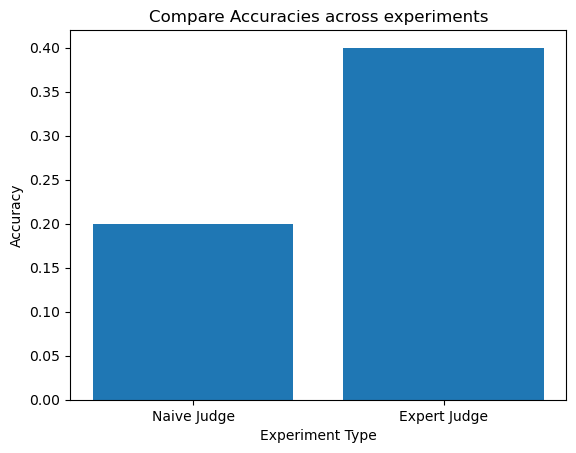

In [19]:
# Build the plot
x_values = [ "Naive Judge", "Expert Judge"]
y_values = [ accuracy_naive_judge, accuracy_expert_judge]
plt.bar(x_values, y_values)
plt.title('Compare Accuracies across experiments')
plt.xnotebookel('Experiment Type')
plt.ynotebookel('Accuracy')
 
plt.show()